In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")

In [5]:
display(file)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [6]:
display(file.shape)

(9134, 24)

In [7]:
file = file.drop(["Unnamed: 0"], axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
display(file)

In [ ]:
file.dtypes

In [ ]:
file.select_dtypes(['int64','float64'])

In [ ]:
file.select_dtypes(['object'])

In [ ]:
display(file.isna().sum())

In [ ]:
file["Location Code"]

In [ ]:
nulls_df = pd.DataFrame(round(file.isna().sum()/len(file), 4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ["header_name", "Percent_nulls"]

In [ ]:
display(nulls_df)

In [ ]:
display(file['State'].unique())
display(file['State'].value_counts())

display(file['State'].value_counts(dropna=False))
len(file[file['State'].isna()==True])

In [8]:
file["State"] = file["State"].fillna("California")

In [9]:
display(file['Response'].unique())
display(file['Response'].value_counts())

display(file['Response'].value_counts(dropna=False))
len(file[file['Response'].isna()==True])

array(['No', 'Yes'], dtype=object)

No     7826
Yes    1308
Name: Response, dtype: int64

No     7826
Yes    1308
Name: Response, dtype: int64

0

In [10]:
file["Response"] = file["Response"].fillna("No")

In [11]:
file["Months Since Last Claim"]

0       32
1       13
2       18
3       18
4       12
        ..
9129    18
9130    14
9131     9
9132    34
9133     3
Name: Months Since Last Claim, Length: 9134, dtype: int64

In [12]:
mean_months = file["Months Since Last Claim"].mean()

In [13]:
print(mean_months)

15.097000218962119


In [14]:
file['Months Since Last Claim'] = file['Months Since Last Claim'].fillna(mean_months)

In [15]:
file["Number of Open Complaints"]

0       0
1       0
2       0
3       0
4       0
       ..
9129    0
9130    0
9131    3
9132    0
9133    0
Name: Number of Open Complaints, Length: 9134, dtype: int64

In [16]:
mean_complaints = file["Number of Open Complaints"].mean()

In [17]:
file['Number of Open Complaints'] = file['Number of Open Complaints'].fillna(mean_complaints)

In [18]:
display(file['Vehicle Class'].unique())
display(file['Vehicle Class'].value_counts())

display(file['Vehicle Class'].value_counts(dropna=False))
len(file[file['Vehicle Class'].isna()==True])

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

0

In [19]:
file["Vehicle Class"] = file["Vehicle Class"].fillna("Four-Door Car")

In [20]:
display(file['Vehicle Size'].unique())
display(file['Vehicle Size'].value_counts())

display(file['Vehicle Size'].value_counts(dropna=False))
len(file[file['Vehicle Size'].isna()==True])

array(['Medsize', 'Small', 'Large'], dtype=object)

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

0

In [21]:
file["Vehicle Size"] = file["Vehicle Size"].fillna("Medsize")

In [22]:
display(file['Vehicle Type'].unique())
display(file['Vehicle Type'].value_counts())

display(file['Vehicle Type'].value_counts(dropna=False))
len(file[file['Vehicle Type'].isna()==True])

KeyError: 'Vehicle Type'

In [23]:
file["Vehicle Type"] = file["Vehicle Type"].fillna("A")

KeyError: 'Vehicle Type'

In [24]:
display(file.loc[:, ["Effective To Date"]].head(70))

,Effective To Date
0,2/24/11
1,1/31/11
2,2/19/11
3,1/20/11
4,2/3/11
...,...
65,1/31/11
66,1/26/11
67,1/10/11
68,1/27/11


In [25]:
file["Effective To Date"] = pd.to_datetime(file["Effective To Date"], errors="coerce")

In [ ]:
file["Effective Month"] = pd.DatetimeIndex(file["Effective To Date"]).month

In [ ]:
date = file["Effective To Date"].copy()

In [ ]:
date[34].month


In [ ]:
file["Effective Month"].unique()

In [ ]:
file[(file["Effective Month"] >= 1) & (file["Effective Month"] <= 3)]

In [ ]:
# Customer Analysis Round 3

In [ ]:
# Show DataFrame info

In [ ]:
file.info()

In [ ]:
# Describe DataFrame

In [ ]:
file.describe("Income").T

In [ ]:
# Show a plot of the total number of responses.

In [ ]:
response_y = list(file["Response"].value_counts())
response_x = list(file["Response"].unique())

In [ ]:
a = np.array(response_y)
plt.bar(response_x, response_y)

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(response_x,response_y)
plt.show()

In [ ]:
# Show a plot of the response rate by the sales channel.

In [ ]:
display(file["Sales Channel"].unique())

In [ ]:
len(file[(file["Response"] == "No") & (file["Sales Channel"] == "Agent")])

In [ ]:
len(file[(file["Response"] == "Yes") & (file["Sales Channel"] == "Agent")])

In [ ]:
channel = []
response = []
for item in list(file["Sales Channel"].unique()):
    channel.append(item)
    response.append(len(file[(file["Response"] == "Yes") & (file["Sales Channel"] == item)]) / len(file["Sales Channel"] == item)*100)
    
    

In [ ]:
print(channel)

In [ ]:
plt.bar(channel, response)

In [ ]:
sns.barplot(channel, response)

In [ ]:
# Show a plot of the response rate by the total claim amount.

In [ ]:
file[file["Response"] == "No"].describe()

In [ ]:
file["Total Claim Amount"]

In [ ]:
filter1 = file[file["Response"] == "No"]

In [ ]:
sum(list(filter1["Total Claim Amount"]))

In [ ]:
sum(list(file[file["Response"] == "No"]["Total Claim Amount"]))

In [ ]:
sum(list(file[file["Response"] == "Yes"]["Total Claim Amount"]))

In [ ]:
# sum

In [ ]:
plt.bar(["Yes", "No"], [sum(list(file[file["Response"] == "Yes"]["Total Claim Amount"])), sum(list(file[file["Response"] == "No"]["Total Claim Amount"]))])
plt.show()

In [ ]:
# mean

In [ ]:
sns.barplot(["Yes", "No"], [np.mean(list(file[file["Response"] == "Yes"]["Total Claim Amount"])), np.mean(list(file[file["Response"] == "No"]["Total Claim Amount"])) ])


In [ ]:
# Show a plot of the response rate by income.

In [ ]:
# sum

In [ ]:
sum(list(file[file["Response"] == "Yes"]["Income"]))

In [ ]:
sum(list(file[file["Response"] == "No"]["Income"]))

In [ ]:
plt.bar(["Yes", "No"], [sum(list(file[file["Response"] == "Yes"]["Income"])), sum(list(file[file["Response"] == "No"]["Income"]))])
plt.show()

In [ ]:
# mean

In [ ]:
sns.barplot(["Yes", "No"], [np.mean(list(file[file["Response"] == "Yes"]["Income"])), np.mean(list(file[file["Response"] == "No"]["Income"])) ])


In [ ]:
np.mean(list(file[file["Response"] == "Yes"]["Total Claim Amount"]))

In [ ]:
np.mean(list(file[file["Response"] == "No"]["Total Claim Amount"]))

In [ ]:
np.mean(list(file[file["Response"] == "Yes"]["Income"]))

In [ ]:
np.mean(list(file[file["Response"] == "No"]["Income"]))

In [23]:
correlation =  file.corr()

In [24]:
display(correlation)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [1]:
# Customer Analysis Round 4

In [4]:
file_round_4 = pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")

In [3]:
display(file_round_4)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [4]:
file_round_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
numerical = file_round_4.select_dtypes(np.number)

In [6]:
display(numerical)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [7]:
categoricals = file_round_4.select_dtypes(np.object)

In [8]:
display(categoricals)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


Now we will try to check the normality of the numerical variables visually

    - Use seaborn library to construct distribution plots for the numerical variables
    - Use Matplotlib to construct histograms
    - Do the distributions for different numerical variables look like a normal distribution


In [10]:
#fig, ax = plt.subplots(len(numerical.columns),2, figsize=(10,100))
#sns.distplot(numerical[column_name[0]], kde=True, ax = ax[0,0])
#sns.histplot(numerical[column_name[0]], ax = ax[0,1])
#sns.distplot(numerical[column_name[1]], ax = ax[1,0])


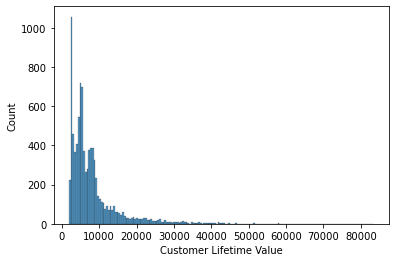

In [25]:
sns.histplot(numerical[column_name[0]]);

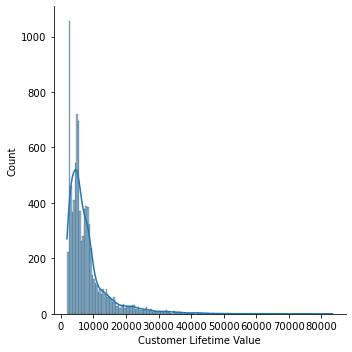

In [26]:
sns.displot(numerical[column_name[0]], kde=True);

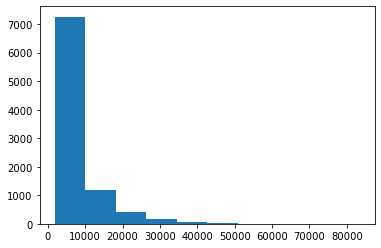

In [27]:
plt.hist(numerical[column_name[0]]);

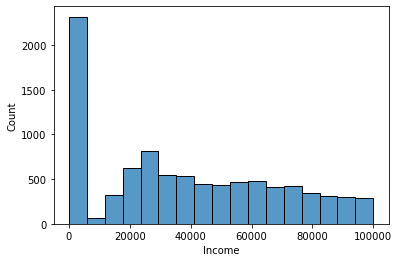

In [28]:
sns.histplot(numerical[column_name[1]]);

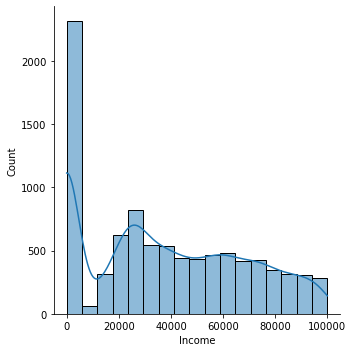

In [29]:
sns.displot(numerical[column_name[1]], kde=True);

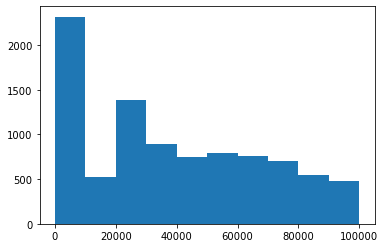

In [30]:
plt.hist(numerical[column_name[1]]);

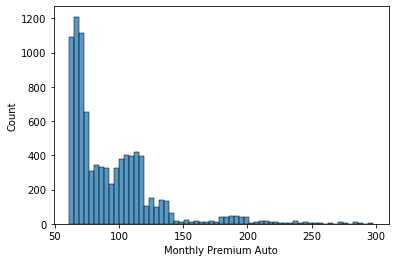

In [31]:
sns.histplot(numerical[column_name[2]]);

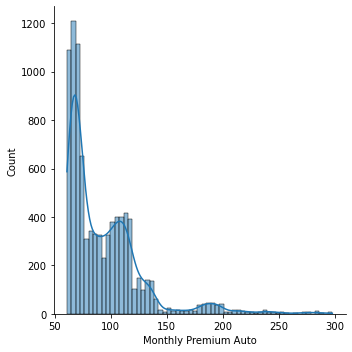

In [32]:
sns.displot(numerical[column_name[2]], kde=True);

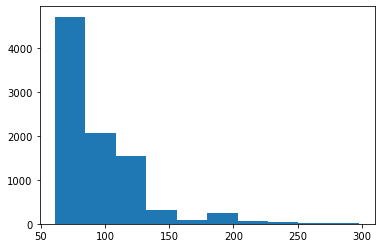

In [33]:
plt.hist(numerical[column_name[2]]);

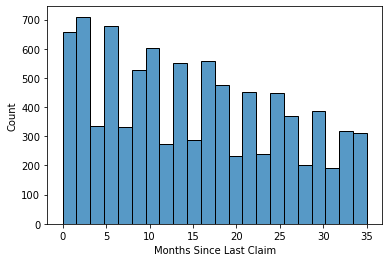

In [34]:
sns.histplot(numerical[column_name[3]]);

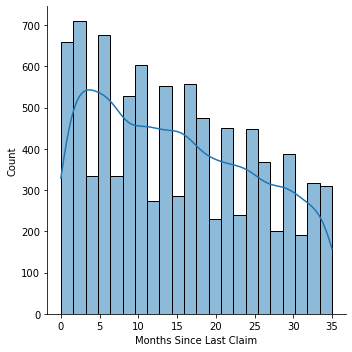

In [35]:
sns.displot(numerical[column_name[3]], kde=True);

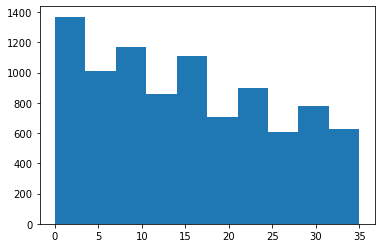

In [36]:
plt.hist(numerical[column_name[3]]);

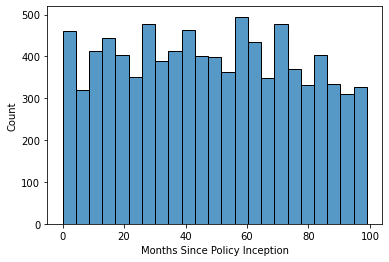

In [37]:
sns.histplot(numerical[column_name[4]]);

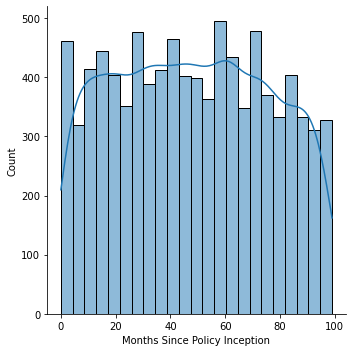

In [38]:
sns.displot(numerical[column_name[4]], kde=True);

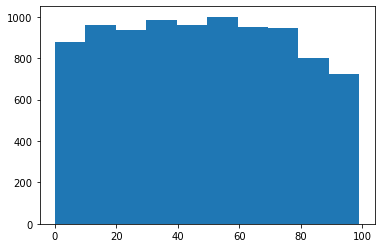

In [39]:
plt.hist(numerical[column_name[4]]);

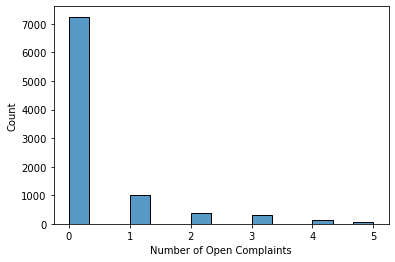

In [40]:
sns.histplot(numerical[column_name[5]]);

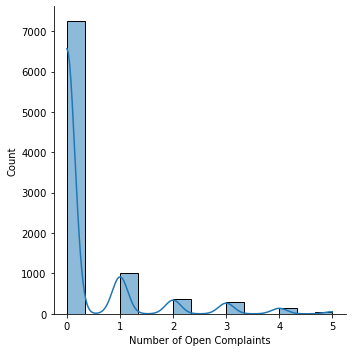

In [41]:
sns.displot(numerical[column_name[5]], kde=True);

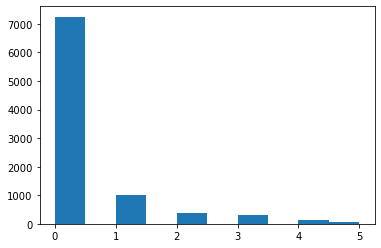

In [42]:
plt.hist(numerical[column_name[5]]);

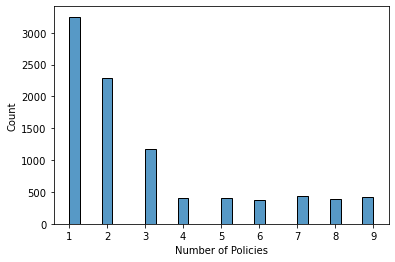

In [43]:
sns.histplot(numerical[column_name[6]]);

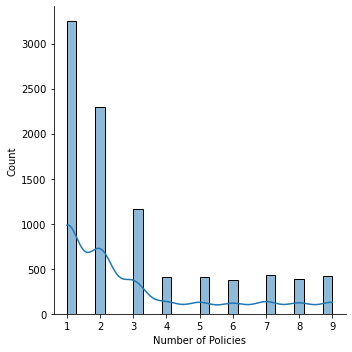

In [44]:
sns.displot(numerical[column_name[6]], kde=True);

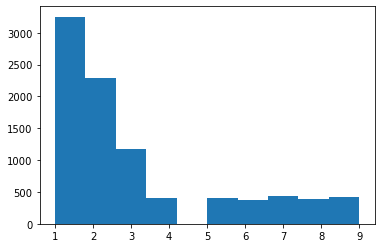

In [45]:
plt.hist(numerical[column_name[6]]);

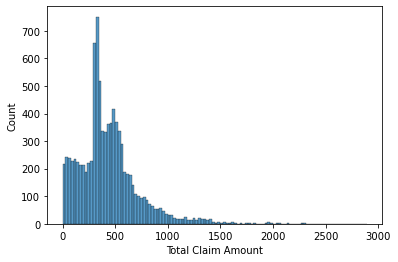

In [46]:
sns.histplot(numerical[column_name[7]]);

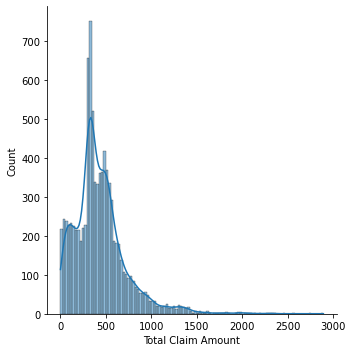

In [47]:
sns.displot(numerical[column_name[7]], kde=True);

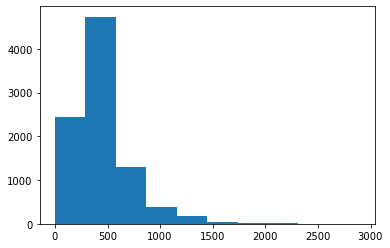

In [48]:
plt.hist(numerical[column_name[7]]);

For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [17]:
numerical.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [14]:
corelated = numerical.corr()

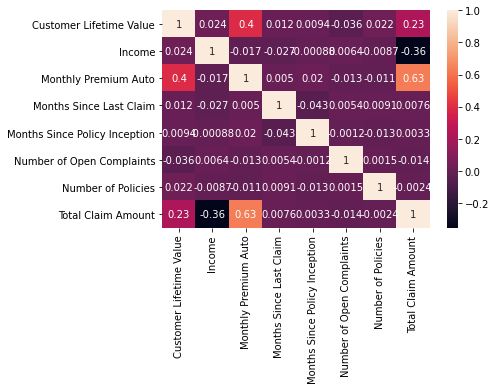

In [15]:
sns.heatmap(corelated, annot = True)

In [ ]:
# There is no high correlation

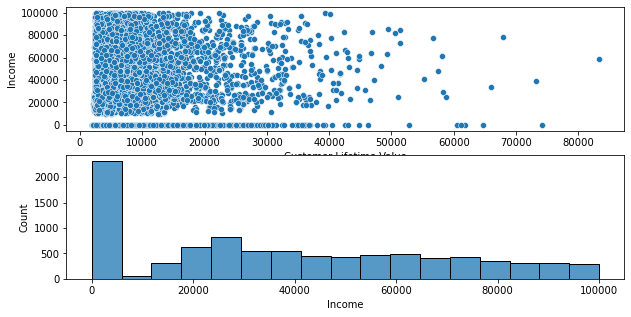

In [22]:
#plt.plot(x= , y=)
#ptl.show()
fig, ax = plt.subplots(2,1, figsize=(10,5)) # now ax =  np.araay of two elements
sns.scatterplot(x='Customer Lifetime Value', y ='Income' ,data = numerical,ax=ax[0])
sns.histplot(x= 'Income',data = numerical,ax = ax[1])
plt.show()